<a href="https://colab.research.google.com/github/toqa-ehab/Heart_Disease_Project/blob/main/02_pca_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. Configure Git
!git config --global user.name "toqa-ehab"
!git config --global user.email "toqaehab19@gmail.com"

# 2. Clone your GitHub repository
!git clone https://github.com/toqa-ehab/Heart_Disease_Project.git

# 3. Navigate into the project folder
%cd Heart_Disease_Project

# 4. Create the required folders (data, notebooks, models, results)
!mkdir -p data notebooks models results

# 5. Check the folder structure was created
!ls

Cloning into 'Heart_Disease_Project'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 13 (delta 3), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (13/13), 257.85 KiB | 9.55 MiB/s, done.
Resolving deltas: 100% (3/3), done.
/content/Heart_Disease_Project/Heart_Disease_Project
data  LICENSE  models  notebooks  README.md  results


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [ ]:
import pandas as pd
import io

column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
# This line uses the 'uploaded' variable from the previous cell
df = pd.read_csv(io.BytesIO(uploaded['heart.csv']), header=None, names=column_names)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
# Save the dataframe to the 'data/' folder for permanent storage
df.to_csv('data/heart.csv', index=False)

# Verify the file is in the right place
print("File saved in:")
!ls data/

File saved in:
heart.csv


In [ ]:
print("Missing values (as '?'):")
print(df.isin(['?']).sum())

import numpy as np
df.replace('?', np.nan, inplace=True)

df['ca'] = pd.to_numeric(df['ca'])
df['thal'] = pd.to_numeric(df['thal'])

print("\nMissing values (NaN):")
print(df.isnull().sum())

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
df[['ca', 'thal']] = imputer.fit_transform(df[['ca', 'thal']])

print("\nMissing values after imputation:")
print(df.isnull().sum().sum())

Missing values (as '?'):
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

Missing values (NaN):
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

Missing values after imputation:
0


In [ ]:
categorical_cols = ['cp', 'restecg', 'slope', 'thal']
print("Unique values in categorical columns:")
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")

# Performing one-hot encoding
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print("\nDataFrame shape after one-hot encoding:", df.shape)

Unique values in categorical columns:
cp: [1. 4. 3. 2.]
restecg: [2. 0. 1.]
slope: [3. 2. 1.]
thal: [6. 3. 7.]

DataFrame shape after one-hot encoding: (303, 19)


In [ ]:
from sklearn.preprocessing import StandardScaler

numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
# Apply scaling
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
print("Numerical features standardized.")

Numerical features standardized.


In [ ]:
# ------------------------------------------------------------------
# DATA INTEGRITY CHECKS
# ------------------------------------------------------------------

print("="*55)
print("1. DATASET SHAPE")
print("="*55)
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}")
print("\n")

print("="*55)
print("2. CHECK FOR DUPLICATE ROWS")
print("="*55)
num_duplicates = df.duplicated().sum()
print(f"Number of completely duplicate rows: {num_duplicates}")
if num_duplicates > 0:
    df = df.drop_duplicates()
    print(f"Removed {num_duplicates} duplicate row(s).")
    print(f"New dataset shape: {df.shape}")
else:
    print("No duplicate rows found. Dataset is clean!")
print("\n")

print("="*55)
print("3. CHECK FOR MISSING VALUES")
print("="*55)
print(df.isnull().sum())
print("\n")

1. DATASET SHAPE
Number of Rows: 303
Number of Columns: 19


2. CHECK FOR DUPLICATE ROWS
Number of completely duplicate rows: 0
No duplicate rows found. Dataset is clean!


3. CHECK FOR MISSING VALUES
age            0
sex            0
trestbps       0
chol           0
fbs            0
thalach        0
exang          0
oldpeak        0
ca             0
target         0
cp_2.0         0
cp_3.0         0
cp_4.0         0
restecg_1.0    0
restecg_2.0    0
slope_2.0      0
slope_3.0      0
thal_6.0       0
thal_7.0       0
dtype: int64




In [ ]:
# ------------------------------------------------------------------
# DATA OVERVIEW
# ------------------------------------------------------------------

print("="*55)
print("4. FIRST 5 ROWS")
print("="*55)
print(df.head())
print("\n")

print("="*55)
print("5. DATASET INFORMATION")
print("="*55)
df.info()
print("\n")

print("="*55)
print("6. SUMMARY STATISTICS")
print("="*55)
print(df.describe())
print("\n")

print("="*55)
print("7. CHECK UNIQUE VALUES IN TARGET COLUMN")
print("="*55)
print(df['target'].value_counts())

4. FIRST 5 ROWS
        age  sex  trestbps      chol  fbs   thalach  exang   oldpeak   ca  \
0  0.948726  1.0  0.757525 -0.264900  1.0  0.017197    0.0  1.087338  0.0   
1  1.392002  1.0  1.611220  0.760415  0.0 -1.821905    1.0  0.397182  3.0   
2  1.392002  1.0 -0.665300 -0.342283  0.0 -0.902354    1.0  1.346147  2.0   
3 -1.932564  1.0 -0.096170  0.063974  0.0  1.637359    0.0  2.122573  0.0   
4 -1.489288  0.0 -0.096170 -0.825922  0.0  0.980537    0.0  0.310912  0.0   

   target  cp_2.0  cp_3.0  cp_4.0  restecg_1.0  restecg_2.0  slope_2.0  \
0       0   False   False   False        False         True      False   
1       2   False   False    True        False         True       True   
2       1   False   False    True        False         True       True   
3       0   False    True   False        False        False      False   
4       0    True   False   False        False         True      False   

   slope_3.0  thal_6.0  thal_7.0  
0       True      True     False  
1     

In [ ]:
# ADJUST TARGET VARIABLE FOR BINARY CLASSIFICATION
# This ensures all values > 0 are set to 1. In this specific dataset, the target was already binary, so no changes were made.

# Convert all values > 0 to 1
df['target'] = (df['target'] > 0).astype(int)

print("Unique values in target AFTER adjustment:")
print(df['target'].value_counts())

Unique values in target AFTER adjustment:
target
0    164
1    139
Name: count, dtype: int64


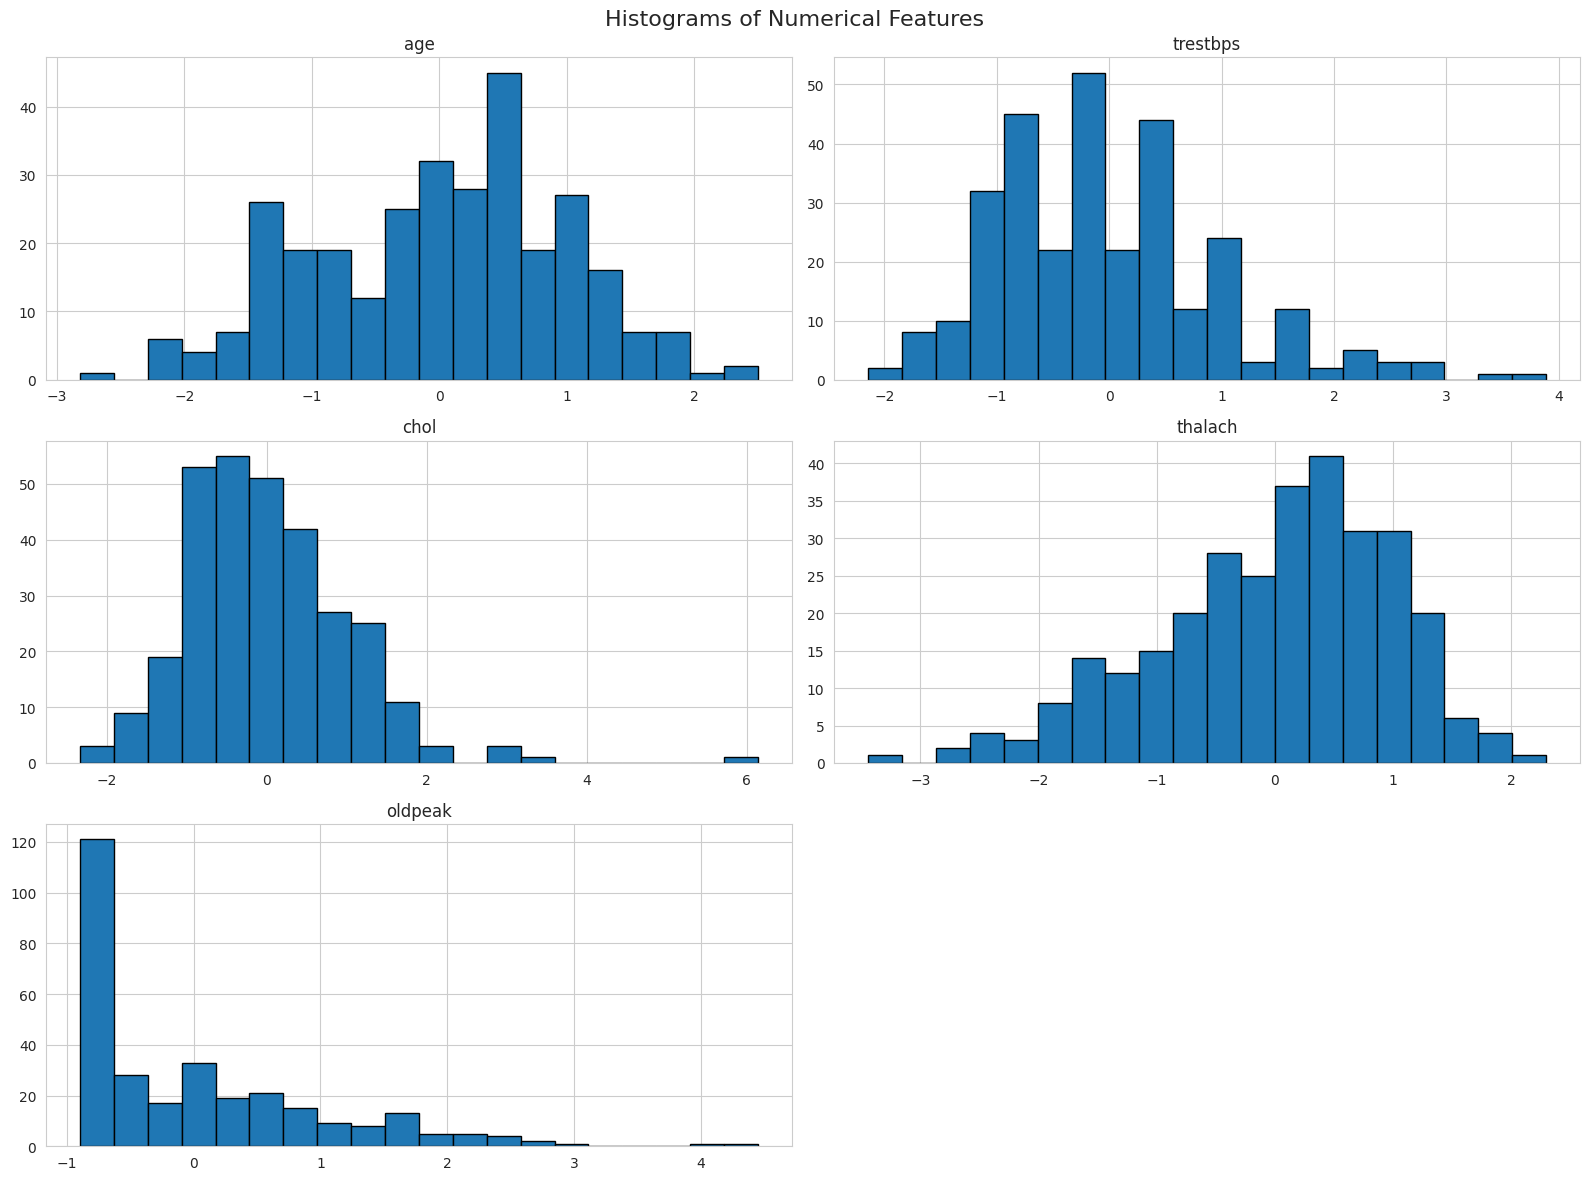

In [ ]:
# 1. Histograms for NUMERICAL features only
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[numerical_features].hist(figsize=(16, 12), bins=20, edgecolor='black')
plt.suptitle('Histograms of Numerical Features', fontsize=16, y=0.98)
plt.tight_layout()
plt.show()

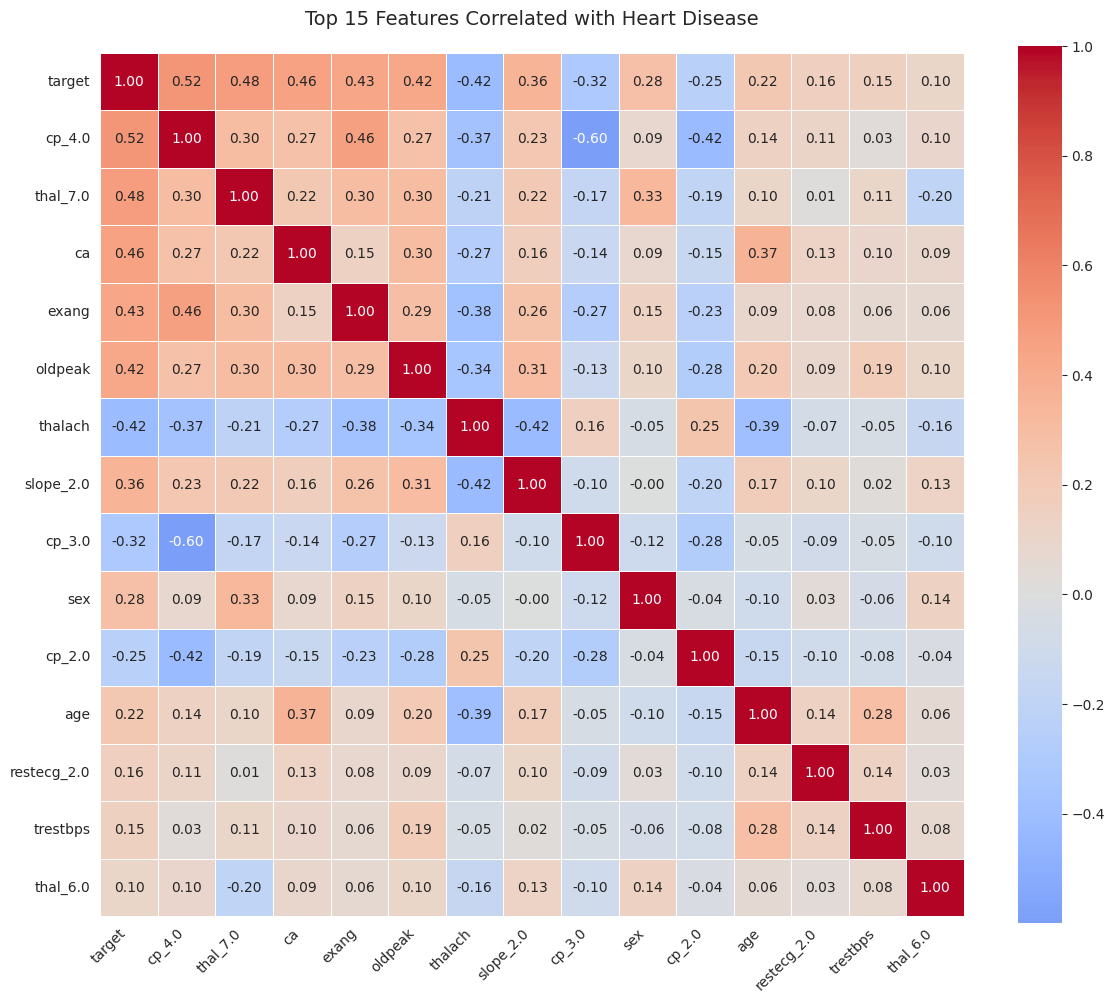

In [ ]:
# 2. FOCUSED Correlation Heatmap
plt.figure(figsize=(12, 10))

# Calculate correlation with the target and get top 15 features
corr_matrix = df.corr()
target_corr = corr_matrix['target'].abs().sort_values(ascending=False)
top_features = target_corr.head(15).index.tolist()
small_corr_matrix = corr_matrix.loc[top_features, top_features]

# Plot the heatmap
sns.heatmap(small_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0, linewidths=0.5, square=True)
plt.title('Top 15 Features Correlated with Heart Disease', fontsize=14, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

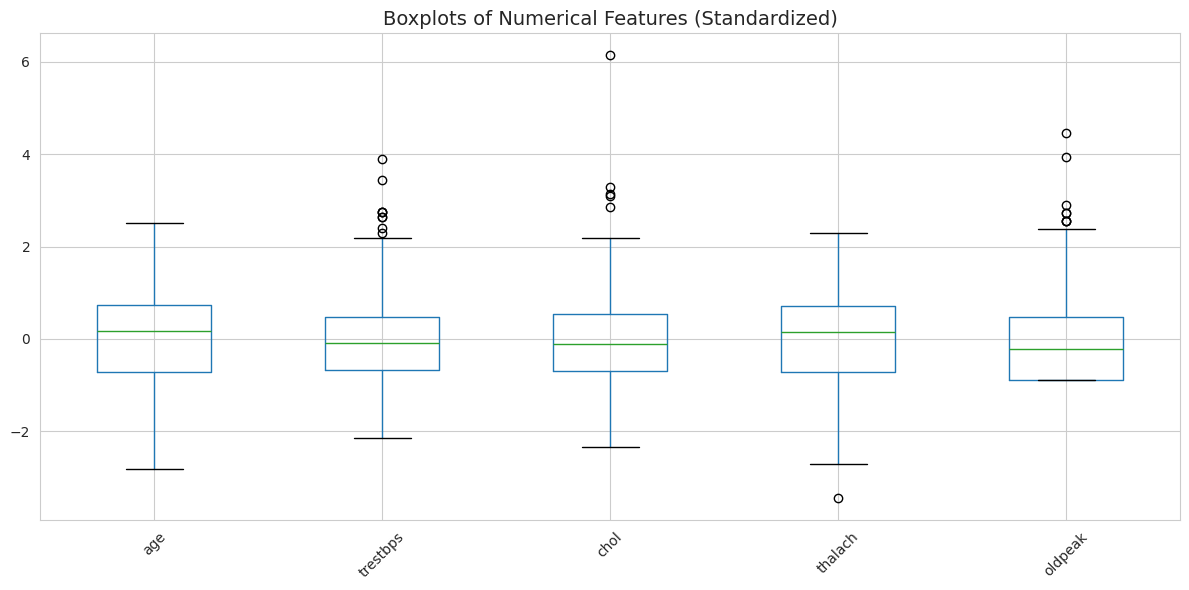

In [ ]:
# 3. Boxplots for Numerical Features
plt.figure(figsize=(12, 6))
df[numerical_features].boxplot()
plt.title('Boxplots of Numerical Features (Standardized)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
# ------------------------------------------------------------------
# Apply PCA and Determine Optimal Number of Components
# ------------------------------------------------------------------

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Separate features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Initialize PCA and fit to data
pca = PCA()
pca.fit(X)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Find the number of components needed to retain 95% variance
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components needed to retain 95% variance: {n_components_95}")

Number of components needed to retain 95% variance: 12


In [20]:
# ------------------------------------------------------------------
# Create PCA-transformed dataset with optimal components
# ------------------------------------------------------------------

pca_optimal = PCA(n_components=12)  # Use the number you found (12)
X_pca = pca_optimal.fit_transform(X)

print(f"Original shape: {X.shape}")
print(f"PCA-transformed shape: {X_pca.shape}")

Original shape: (303, 18)
PCA-transformed shape: (303, 12)


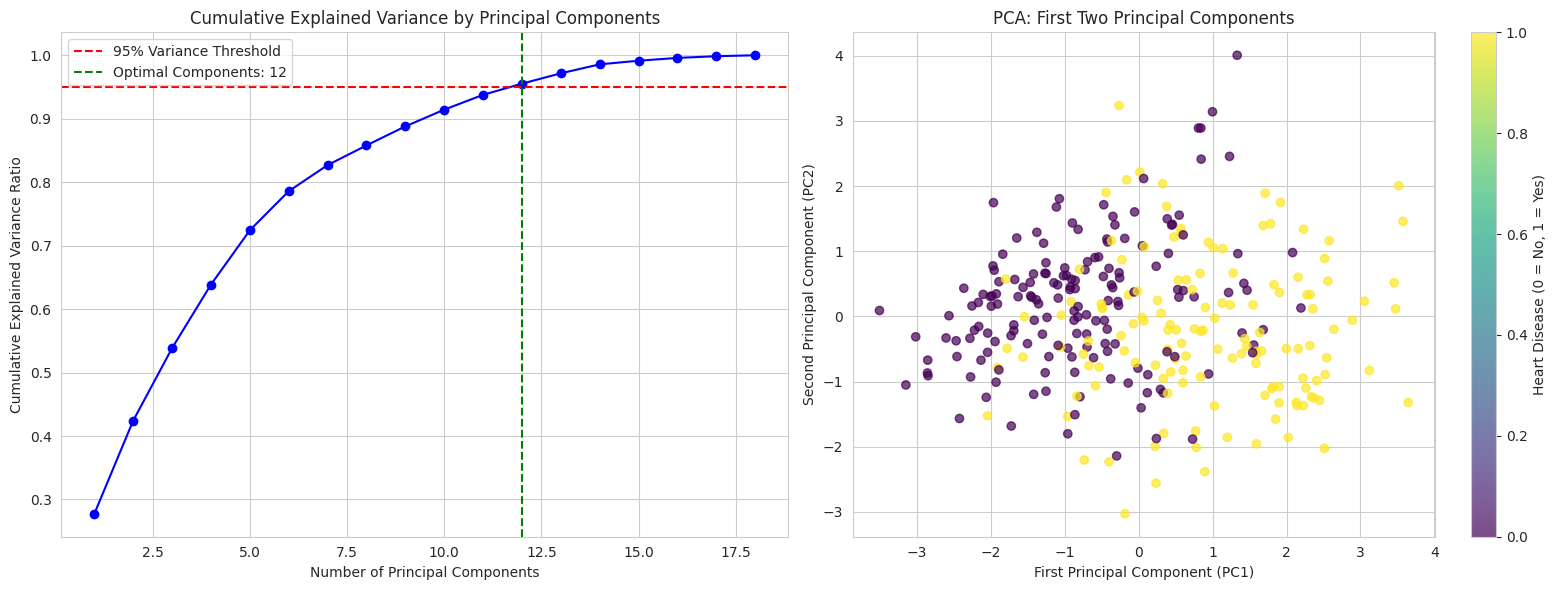

In [21]:
# ------------------------------------------------------------------
# Visualize PCA Results
# ------------------------------------------------------------------

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Cumulative Explained Variance Plot
ax1.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'b-', marker='o')
ax1.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Threshold')
ax1.axvline(x=n_components_95, color='g', linestyle='--', label=f'Optimal Components: {n_components_95}')
ax1.set_title('Cumulative Explained Variance by Principal Components')
ax1.set_xlabel('Number of Principal Components')
ax1.set_ylabel('Cumulative Explained Variance Ratio')
ax1.legend()
ax1.grid(True)

# Plot 2: Scatter Plot of First Two Principal Components
X_pca_2d = pca.transform(X)[:, :2]  # Get first two components for visualization
scatter = ax2.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y, cmap='viridis', alpha=0.7)
ax2.set_title('PCA: First Two Principal Components')
ax2.set_xlabel('First Principal Component (PC1)')
ax2.set_ylabel('Second Principal Component (PC2)')
plt.colorbar(scatter, label='Heart Disease (0 = No, 1 = Yes)')
ax2.grid(True)

plt.tight_layout()
plt.show()